# How to correctly calculate an autocorrelation function in python

In statistical physics, an autocorrelation function is used to understand a system's nonequilibrium behaivor.<br>
However, the definition of autocorrelation function used in physics (or statistics) is different from the definition of correlation function used in signal processing.<br>
The physicist's definition is,
$$
\left<x_n x_0\right>=\frac{1}{m-n}\sum_{i=0}^{m-1} x_{n+i} x_i,
$$
where $m$ is the number of elements. Note that $x_i$ becomes $0$ if $i>m-1$.
In the mean time, that of signal processing is
$$
\left<x_n x_0\right>=\sum_{i=0}^{m-1} x_{n+i} x_i.
$$
Unfortunately, the physicist's version is not implemented in popular python packages such as numpy and scipy.<br>
Naively using scipy.signal.correlate due to its cosmetic similarity, therefore, often leaves physicists puzzled, forcing them to implement their own algorithms.<br>
Due to a large number of iterations, however, such algorithms are likely to be very slow when directly implemented in python, especially compared to the scipy.signal.correlate function.<br>

Here, we showcase two autocorrelation function implementations that use fast algorithms of the scipy library.<br>
The first method is using the fast Fourier transform (FFT) algorithm (scipy.fftpack). Note that the FFT method by defualt performs a cyclical convolution, but an autocorrelation is defined as an acyclical convolution.<br>
So, blindly implementing the FFT method results in an incorrect autucorrelation function. To remedy this, we insert some zeros in the data, the so-called zero padding, so that the algorithm runs as if it's acyclical. You can see the difference in the figure below.<br>
The second method is to modify scipy.signal.correlate so that it complies with the physicist's definition of autocorrelation function. It involves dividing each entry by the number of data points that are correlated, i.e., we are calculating the average of correlation.

Below is the results of the said algorithms, and comparisons with the manually (but slow) computed results.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import autocorrelation

In [3]:
time = np.linspace(0,1,10000)
data = time

In [4]:
ctime0, correl0 = autocorrelation.correlation_fft(time,data,zero_padding=False)
ctime1, correl1 = autocorrelation.correlation_fft(time,data,zero_padding=True)
ctime2, correl2 = autocorrelation.correlation_manual(time,data)
ctime3, correl3 = autocorrelation.correlation_scipy(time,data)

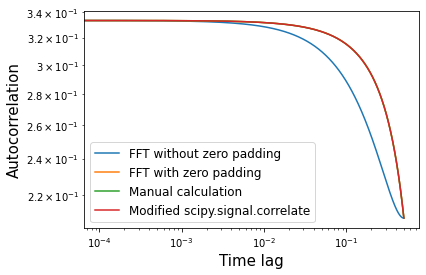

In [5]:
plt.figure()
plt.loglog(ctime0,correl0, label='FFT without zero padding')
plt.loglog(ctime1,correl1, label='FFT with zero padding')
plt.loglog(ctime2,correl2, label='Manual calculation')
plt.loglog(ctime3,correl3, label='Modified scipy.signal.correlate')
plt.xlabel('Time lag',fontsize=15)
plt.ylabel('Autocorrelation',fontsize=15)
plt.legend(fontsize=12)
plt.savefig('figure.png',dpi=100,bbox_inches='tight')
plt.show()
